Check the performance of Schultz-Zimm distribution

In [1]:
import numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt
import copy
from scipy.optimize import curve_fit as curve_fit
import scipy.stats as ss

In [18]:
def schulz_zimm(x,a,b):
    
    mu = np.mean(x)
    numerator = (a**b+1)*np.exp(-a*x/mu)*x**(b)
    denominator = gamma(b+1)*mu
    p = numerator/denominator
    return p




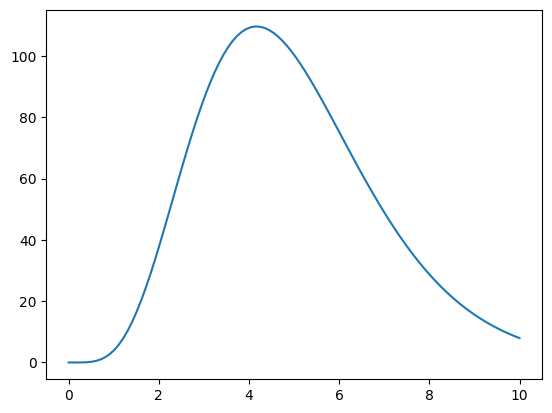

In [3]:
# Quick Test of this distribution
x = np.linspace(0,10,100)
a = 6
b = 6
y = schulz_zimm(x,a,b)
plt.plot(x,y)

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

filename = '../Results/L1 2.5 nM'#'salvaged_RC_data.csv'#'dataset_072522.csv'
files = ["L1 2.5 nM","L1 5nM","L1 10nM"]

files = ["L3","L4 5nM","L4 10nM"]
#files = ["L1 2.5 nM mixing ","L1 5 nM mixing","L1 10 nM mixing"]
#files = ["L2 2.5nM","L2 5 nM","L2 10nM"]
files_path = [f'../Results/{file}.csv' for file in files]
df_exp = [pd.read_csv(file) for file in files_path]

label="Labels"
features=features=['area',
#        'equivalent_diameter', 
#        'orientation', 
    'major_axis_length',
    'minor_axis_length',
    'perimeter',
        'min_intensity',
        'mean_intensity',
#        'max_intensity',
    'solidity',
    'major_axis_length/minor_axis_length',
    'perimeter/major_axis_length',
    'perimeter/minor_axis_length',
          'feret_diameter_max',
      'moments_hu-0',
      'moments_hu-1',
      'moments_hu-2',
      'moments_hu-3',
      'moments_hu-4',
      'moments_hu-5',
      'moments_hu-6',
   'eccentricity'
         ]


FileNotFoundError: [Errno 2] No such file or directory: '../Results/L2 2.5nM.csv'

In [5]:
print("DATA SUMMARY")
for label in ["Crystal","Multiple Crystal","Incomplete","Poorly Segmented"]:
    print(f'For label {label}...')
    for df,file in list(zip(df_exp,files)):
        print(f'{file} has {len(df[df["Labels"] == label])}')

DATA SUMMARY
For label Crystal...
L3 has 668
L4 5nM has 865
L4 10nM has 827
For label Multiple Crystal...
L3 has 271
L4 5nM has 398
L4 10nM has 349
For label Incomplete...
L3 has 307
L4 5nM has 501
L4 10nM has 456
For label Poorly Segmented...
L3 has 173
L4 5nM has 285
L4 10nM has 235


In [6]:
def get_frequency(df,histogram_bins,feature):
    # Get frequency of each bin (a value in histogram_bins is the right edge of bin)
    df_mod = copy.deepcopy(df)
    freq = []
    lb = 0
    for h_bin in histogram_bins:
        subset = df_mod[(df_mod[feature] < h_bin) & (df_mod[feature] > lb)]
        freq.append(len(subset))
        lb = h_bin
    return freq

area
L3
LOGNORM (9.31202614153716, 1229.1565999999996, 16.69466364757633)
1.1606647076118124 [6.22414228 0.43113813] SUM 1.0
L4 5nM
LOGNORM (8.693762346190303, 438.9844999999996, 17.34800064638896)
1.084835866301139 [11.7874673   0.48557054] SUM 0.9999999999999999
L4 10nM
LOGNORM (9.941345105403817, 438.98449999999985, 20.840279085846518)
1.1132819995332133 [8.8275278  0.46242847] SUM 1.0
L3
LOGNORM (9.189513677188485, 1492.5472999999993, 31.86132787851858)
1.2512708197952145 [3.97976972 0.3877878 ] SUM 1.0
L4 5nM
LOGNORM (9.299255265764355, 702.3751999999997, 20.93140888844124)
1.1462696960938883 [6.83668611 0.43585502] SUM 1.0
L4 10nM
LOGNORM (9.699390795380577, 2194.9224999999997, 16.79007731119897)
1.138545081858033 [7.21786719 0.44009703] SUM 0.9971346704871059
L3
LOGNORM (9.673026340950397, 263.3906998679211, 17.984350608251283)
1.0319089953518845 [31.33912519  0.50283961] SUM 0.9153094462540717
L4 5nM
LOGNORM (1302256.4751041369, 263.39069999999987, 16.33340868193207)
1.04248616

/tmp/ipykernel_18257/1744330651.py:67: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


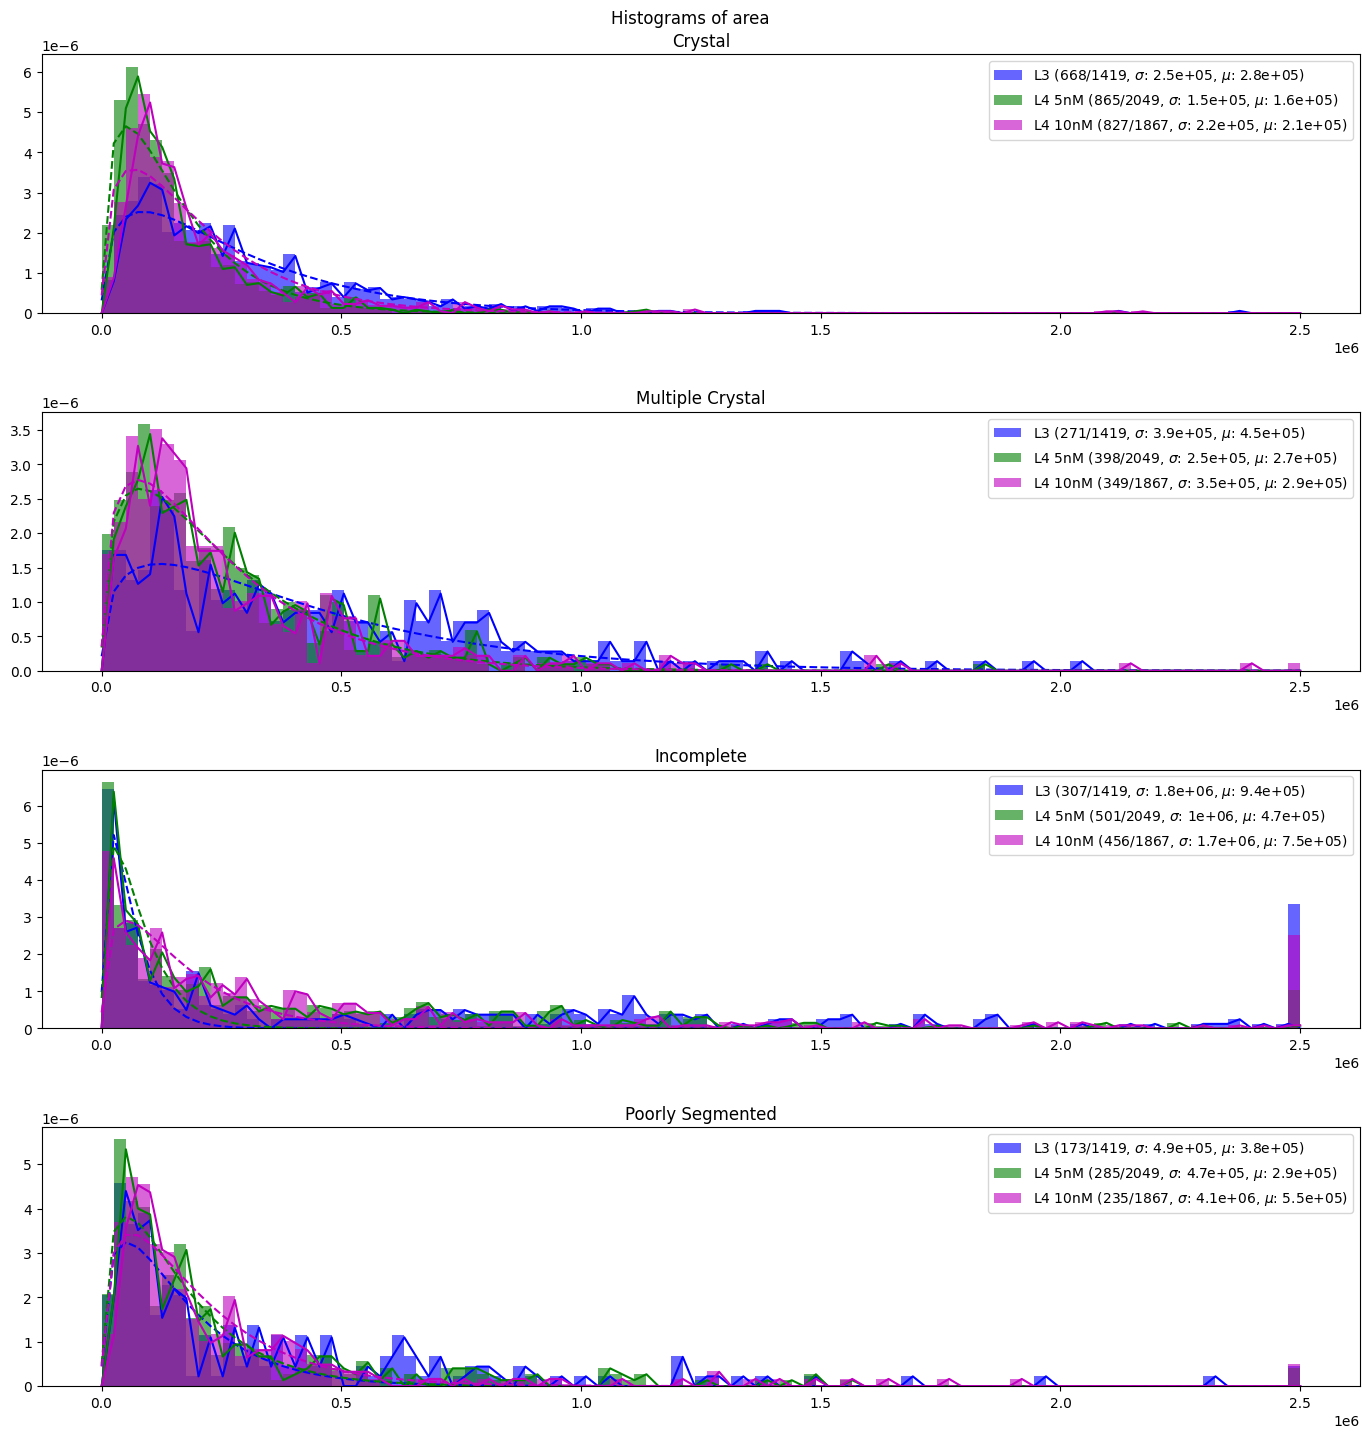

In [19]:
color =["b","g","m","r"]

histogram_features = ['area',
                      #'feret_diameter_max'
                     ]

for histogram_feature in histogram_features:
    print(histogram_feature)
    maxed = 2.50*10**6 if histogram_feature == 'area' else 2000
    fig, ax = plt.subplots(4, 1,figsize = (15, 15))
    fig.tight_layout(pad=5.0)
    fig.suptitle(f'Histograms of {histogram_feature}')
    class_list = ["Crystal","Multiple Crystal","Incomplete","Poorly Segmented"]
    histogram_min = min([min(df[histogram_feature]) for df in df_exp])
    histogram_max = max([max(df[histogram_feature]) for df in df_exp])
    histogram_bins = np.round(np.linspace(histogram_min,maxed,100))


    for ii in np.arange(len(class_list)):
        for c_index,(df,file) in enumerate(list(zip(df_exp,files))):
            c=color[c_index]
            print(file)
            sub_df = df[df["Labels"] == class_list[ii]]
            x_data = sub_df[histogram_feature]
            counts = len(x_data)
            total_counts = len(df)
            sigma = np.std(x_data)
            mu = np.mean(x_data)
            
            ax[ii].hist(np.clip(x_data,histogram_bins[0],histogram_bins[-1]),\
                        alpha=0.6,label=f'{file} ({counts}/{total_counts}, $\sigma$: {sigma:.2}, $\mu$: {mu:.2})'\
                        ,bins=histogram_bins,density=True,color=c)
            
            
            # log normal
            param = ss.lognorm.fit(x_data,sigma,loc=mu,scale=14)
            print("LOGNORM",param)
            ln = ss.lognorm(*param)
            pdf = ln.pdf(x_data)
            #pdf = ln.pdf(x,*param)
            x_line = np.linspace(0,max(x_data),1000)
            #ax[ii].plot(x_line,ss.lognorm.pdf(x_line,1),c=c)
            #ax[ii].xlim(0,10)
            #print(pdf)
            
            # Schulz
            freq = get_frequency(sub_df,histogram_bins,histogram_feature)
            prob = np.array(freq)/((counts)*histogram_bins[0])
            popt,pcov = curve_fit(schulz_zimm,histogram_bins,prob)
            
            ax[ii].plot(histogram_bins,prob/100,color=c)
            x_smooth = np.linspace(0,max(x_data),1000)
            
            ax[ii].plot(histogram_bins,schulz_zimm(histogram_bins,*popt)/100,color=c,linestyle="--")
            print(1/popt[0]+1,popt[:],"SUM",np.sum(np.array(prob)*histogram_bins[0]))
        ax[ii].title.set_text(class_list[ii])
        ax[ii].legend()
        
        #xlabels = histogram_bins[1:].astype(str)
        #xlabels[-1] += '+'

        #N_labels = len(xlabels)
        #fig.xlim([0, maxed])
        #ax[ii].xticks(25 * np.arange(N_labels) + 12.5)
        #ax[ii].set_xticklabels(xlabels)
        
    fig.show()

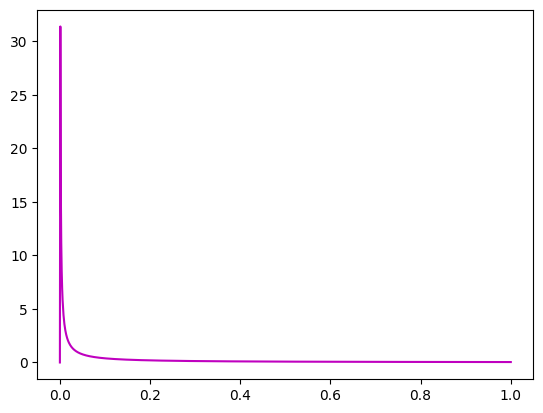

In [8]:
ln = ss.lognorm(*param)
pdf = ln.pdf(x_data)
#pdf = ln.pdf(x,*param)
x_line = np.linspace(0,1,1000)
plt.plot(x_line,ss.lognorm.pdf(x_line,10),c=c)
#plt.xlim(0,10)

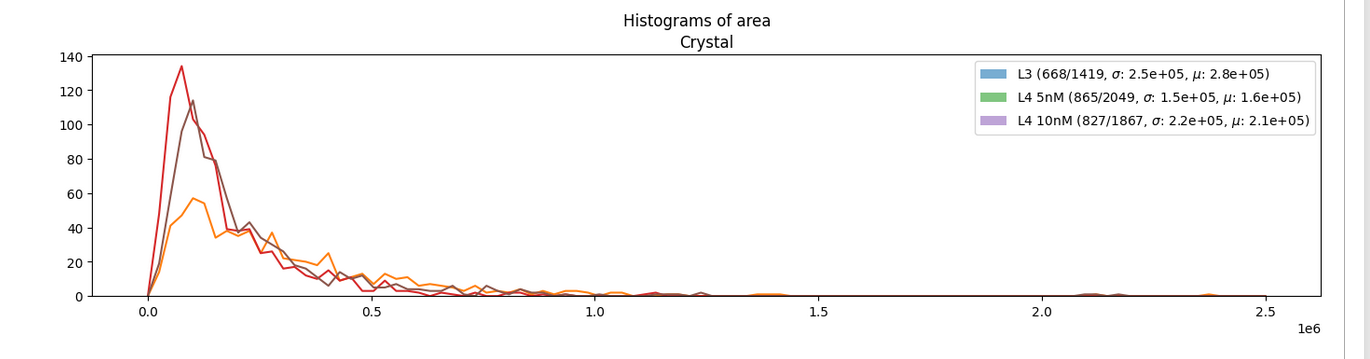